In [24]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

In [25]:
df_sinh_vien = pd.read_excel('DuLieuThucHanh2_K66_GuiSV_V1.xlsx')
df_diem_mon_1 = pd.read_excel('DuLieuThucHanh2_K66_GuiSV_V1.xlsx', sheet_name="Diem Mon 1")
df_diem_mon_2 = pd.read_excel('DuLieuThucHanh2_K66_GuiSV_V1.xlsx', sheet_name="Diem Mon 2")
df_diem_mon_3 = pd.read_excel('DuLieuThucHanh2_K66_GuiSV_V1.xlsx', sheet_name="Diem Mon 3")

df_sinh_vien["Ngay Sinh"] = df_sinh_vien["Ngay Sinh"].dt.strftime('%m/%d/%Y')

In [9]:
df_sinh_vien

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly
0,1,189456,Hoang Minh Giam,05/11/2003,Nam,66PM1
1,2,198436,Nguyen Duc Tuan,06/17/2003,Nam,66PM5
2,3,208472,Huynh Minh Thanh,01/21/2003,Nam,66MHT1
3,4,867686,Nguyen Minh Thang,02/16/2003,Nam,66PM1
4,5,656768,Nguyen Thi Ngoc Huyen,06/22/2003,Nu,66PM2
5,6,132435,Nguyen Minh Chien,08/25/2003,Nam,66PM3
6,7,244456,Phan Gia Huy,09/22/2003,Nam,66PM4
7,8,323455,Pham Sy Minh,08/15/2003,Nam,66PM4
8,9,154546,Le Thanh Thu,07/23/2003,Nu,66PM5
9,10,233425,Tran Nhat Minh,06/22/2003,Nam,66PM6


In [26]:
df_diem_mon_1

,STT,Ma Sinh Vien,Ho Ten,Diem Qua Trinh,Diem Cuoi Ky
0,1,189456,Hoang Minh Giam,7.0,4.00
1,2,198436,Nguyen Duc Tuan,6.0,4.50
2,3,208472,Huynh Minh Thanh,8.5,6.00
3,4,867686,Nguyen Minh Thang,8.0,7.50
4,5,656768,Nguyen Thi Ngoc Huyen,8.5,7.00
5,6,132435,Nguyen Minh Chien,7.0,6.00
6,7,244456,Phan Gia Huy,7.4,8.50
7,8,323455,Pham Sy Minh,9.0,4.00
8,9,154546,Le Thanh Thu,9.5,9.00
9,10,233425,Tran Nhat Minh,6.5,6.40


In [27]:
df_diem_mon_2

,STT,Ma Sinh Vien,Ho Ten,Diem Qua Trinh,Diem Cuoi Ky
0,1,189456,Hoang Minh Giam,6.0,4.50
1,2,198436,Nguyen Duc Tuan,5.0,2.00
2,3,208472,Huynh Minh Thanh,8.0,6.00
3,4,867686,Nguyen Minh Thang,8.0,7.50
4,5,656768,Nguyen Thi Ngoc Huyen,8.5,1.00
5,6,132435,Nguyen Minh Chien,7.0,6.00
6,7,244456,Phan Gia Huy,7.5,2.00
7,8,323455,Pham Sy Minh,9.0,4.00
8,9,154546,Le Thanh Thu,9.5,9.00
9,10,233425,Tran Nhat Minh,6.5,3.00


In [28]:
df_diem_mon_3

,STT,Ma Sinh Vien,Ho Ten,Diem Qua Trinh,Diem Cuoi Ky
0,1,189456,Hoang Minh Giam,5.5,3.00
1,2,198436,Nguyen Duc Tuan,6.0,8.00
2,3,208472,Huynh Minh Thanh,8.0,5.00
3,4,867686,Nguyen Minh Thang,8.0,2.00
4,5,656768,Nguyen Thi Ngoc Huyen,8.5,7.00
5,6,132435,Nguyen Minh Chien,7.0,6.00
6,7,244456,Phan Gia Huy,7.5,1.00
7,8,323455,Pham Sy Minh,9.0,4.00
8,9,154546,Le Thanh Thu,9.5,9.00
9,10,233425,Tran Nhat Minh,6.5,2.00


In [29]:
df_sv_diem1 = pd.merge(df_sinh_vien, df_diem_mon_1, on=["STT", "Ma Sinh Vien", "Ho Ten"])
df_sv_diem1["Diem Tong Ket Mon 1"] = df_sv_diem1["Diem Qua Trinh"] * 0.3 + df_sv_diem1["Diem Cuoi Ky"] * 0.7

df_sv_diem12 = pd.merge(df_sv_diem1, df_diem_mon_2, on=["STT", "Ma Sinh Vien", "Ho Ten"])
df_sv_diem12["Diem Tong Ket Mon 2"] = df_sv_diem12["Diem Qua Trinh_y"] * 0.3 + df_sv_diem12["Diem Cuoi Ky_y"] * 0.7

df_sv_diem12.rename(columns = {'Diem Qua Trinh_x':'Diem Qua Trinh Mon 1', 'Diem Cuoi Ky_x':'Diem Cuoi Ky Mon 1', 'Diem Qua Trinh_y':'Diem Qua Trinh Mon 2', 'Diem Cuoi Ky_y':'Diem Cuoi Ky Mon 2'}, inplace = True) 

df_tong_hop = pd.merge(df_sv_diem12, df_diem_mon_3, on=["STT", "Ma Sinh Vien", "Ho Ten"])
df_tong_hop["Diem Tong Ket Mon 3"] = df_tong_hop["Diem Qua Trinh"] * 0.3 + df_tong_hop["Diem Cuoi Ky"] * 0.7
df_tong_hop.rename(columns = {'Diem Qua Trinh':'Diem Qua Trinh Mon 3', 'Diem Cuoi Ky':'Diem Cuoi Ky Mon 3'}, inplace = True) 

df_tong_hop["Diem Trung Binh"] = (df_tong_hop["Diem Tong Ket Mon 1"] + df_tong_hop["Diem Tong Ket Mon 2"] + df_tong_hop["Diem Tong Ket Mon 3"]) / 3

df_tong_hop

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly,Diem Qua Trinh Mon 1,Diem Cuoi Ky Mon 1,Diem Tong Ket Mon 1,Diem Qua Trinh Mon 2,Diem Cuoi Ky Mon 2,Diem Tong Ket Mon 2,Diem Qua Trinh Mon 3,Diem Cuoi Ky Mon 3,Diem Tong Ket Mon 3,Diem Trung Binh
0,1,189456,Hoang Minh Giam,05/11/2003,Nam,66PM1,7.0,4.00,4.900,6.0,4.50,4.950,5.5,3.00,3.750,4.533333
1,2,198436,Nguyen Duc Tuan,06/17/2003,Nam,66PM5,6.0,4.50,4.950,5.0,2.00,2.900,6.0,8.00,7.400,5.083333
2,3,208472,Huynh Minh Thanh,01/21/2003,Nam,66MHT1,8.5,6.00,6.750,8.0,6.00,6.600,8.0,5.00,5.900,6.416667
3,4,867686,Nguyen Minh Thang,02/16/2003,Nam,66PM1,8.0,7.50,7.650,8.0,7.50,7.650,8.0,2.00,3.800,6.366667
4,5,656768,Nguyen Thi Ngoc Huyen,06/22/2003,Nu,66PM2,8.5,7.00,7.450,8.5,1.00,3.250,8.5,7.00,7.450,6.050000
5,6,132435,Nguyen Minh Chien,08/25/2003,Nam,66PM3,7.0,6.00,6.300,7.0,6.00,6.300,7.0,6.00,6.300,6.300000
6,7,244456,Phan Gia Huy,09/22/2003,Nam,66PM4,7.4,8.50,8.170,7.5,2.00,3.650,7.5,1.00,2.950,4.923333
7,8,323455,Pham Sy Minh,08/15/2003,Nam,66PM4,9.0,4.00,5.500,9.0,4.00,5.500,9.0,4.00,5.500,5.500000
8,9,154546,Le Thanh Thu,07/23/2003,Nu,66PM5,9.5,9.00,9.150,9.5,9.00,9.150,9.5,9.00,9.150,9.150000
9,10,233425,Tran Nhat Minh,06/22/2003,Nam,66PM6,6.5,6.40,6.430,6.5,3.00,4.050,6.5,2.00,3.350,4.610000


In [30]:
print(df_sv_diem1)


    STT  Ma Sinh Vien                  Ho Ten   Ngay Sinh Gioi Tinh  \
0     1        189456         Hoang Minh Giam  05/11/2003       Nam   
1     2        198436         Nguyen Duc Tuan  06/17/2003       Nam   
2     3        208472        Huynh Minh Thanh  01/21/2003       Nam   
3     4        867686       Nguyen Minh Thang  02/16/2003       Nam   
4     5        656768  Nguyen Thi Ngoc Huyen   06/22/2003        Nu   
5     6        132435      Nguyen Minh Chien   08/25/2003       Nam   
6     7        244456            Phan Gia Huy  09/22/2003       Nam   
7     8        323455            Pham Sy Minh  08/15/2003       Nam   
8     9        154546            Le Thanh Thu  07/23/2003        Nu   
9    10        233425         Tran Nhat Minh   06/22/2003       Nam   
10   11        213235       Nguyen Ha Phuong   04/23/2003        Nu   
11   12        189898     Nguyen Thi Ngoc Mai  10/07/2003        Nu   
12   13        244556        Hoang Ngoc Minh   11/18/2003       Nam   
13   1

In [31]:
df_ko_qua_mon_1 = df_tong_hop.loc[(df_tong_hop["Diem Tong Ket Mon 1"] < 4.0)] 

df_ko_qua_mon_1

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly,Diem Qua Trinh Mon 1,Diem Cuoi Ky Mon 1,Diem Tong Ket Mon 1,Diem Qua Trinh Mon 2,Diem Cuoi Ky Mon 2,Diem Tong Ket Mon 2,Diem Qua Trinh Mon 3,Diem Cuoi Ky Mon 3,Diem Tong Ket Mon 3,Diem Trung Binh


In [32]:
df_ko_qua_mon_2 = df_tong_hop.loc[(df_tong_hop["Diem Tong Ket Mon 2"] < 4.0)] 

df_ko_qua_mon_2

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly,Diem Qua Trinh Mon 1,Diem Cuoi Ky Mon 1,Diem Tong Ket Mon 1,Diem Qua Trinh Mon 2,Diem Cuoi Ky Mon 2,Diem Tong Ket Mon 2,Diem Qua Trinh Mon 3,Diem Cuoi Ky Mon 3,Diem Tong Ket Mon 3,Diem Trung Binh
1,2,198436,Nguyen Duc Tuan,06/17/2003,Nam,66PM5,6.0,4.50,4.950,5.0,2.0,2.90,6.0,8.00,7.400,5.083333
4,5,656768,Nguyen Thi Ngoc Huyen,06/22/2003,Nu,66PM2,8.5,7.00,7.450,8.5,1.0,3.25,8.5,7.00,7.450,6.050000
6,7,244456,Phan Gia Huy,09/22/2003,Nam,66PM4,7.4,8.50,8.170,7.5,2.0,3.65,7.5,1.00,2.950,4.923333
11,12,189898,Nguyen Thi Ngoc Mai,10/07/2003,Nu,66PM3,5.5,7.25,6.725,5.5,2.0,3.05,5.5,7.25,6.725,5.500000
13,14,123456,Nguyen Long Vu,12/09/2003,Nam,66PM3,6.5,8.25,7.725,6.3,1.0,2.59,6.5,8.25,7.725,6.013333


In [33]:
df_ko_qua_mon_3 = df_tong_hop.loc[(df_tong_hop["Diem Tong Ket Mon 3"] < 4.0)] 

df_ko_qua_mon_3

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly,Diem Qua Trinh Mon 1,Diem Cuoi Ky Mon 1,Diem Tong Ket Mon 1,Diem Qua Trinh Mon 2,Diem Cuoi Ky Mon 2,Diem Tong Ket Mon 2,Diem Qua Trinh Mon 3,Diem Cuoi Ky Mon 3,Diem Tong Ket Mon 3,Diem Trung Binh
0,1,189456,Hoang Minh Giam,05/11/2003,Nam,66PM1,7.0,4.00,4.900,6.0,4.50,4.950,5.5,3.0,3.75,4.533333
3,4,867686,Nguyen Minh Thang,02/16/2003,Nam,66PM1,8.0,7.50,7.650,8.0,7.50,7.650,8.0,2.0,3.80,6.366667
6,7,244456,Phan Gia Huy,09/22/2003,Nam,66PM4,7.4,8.50,8.170,7.5,2.00,3.650,7.5,1.0,2.95,4.923333
9,10,233425,Tran Nhat Minh,06/22/2003,Nam,66PM6,6.5,6.40,6.430,6.5,3.00,4.050,6.5,2.0,3.35,4.610000
12,13,244556,Hoang Ngoc Minh,11/18/2003,Nam,66PM2,7.5,8.00,7.850,7.4,8.00,7.820,7.5,1.0,2.95,6.206667
14,15,325213,Nguyen Hai Nam,11/11/2003,Nam,66PM1,8.0,6.75,7.125,8.0,6.75,7.125,8.0,2.0,3.80,6.016667


In [34]:
df_qua = df_tong_hop.loc[(df_tong_hop["Diem Tong Ket Mon 1"] >= 4.0) & (df_tong_hop["Diem Tong Ket Mon 2"] >= 4.0) & (df_tong_hop["Diem Tong Ket Mon 3"] >= 4.0)]

df_qua

,STT,Ma Sinh Vien,Ho Ten,Ngay Sinh,Gioi Tinh,Lop Quan Ly,Diem Qua Trinh Mon 1,Diem Cuoi Ky Mon 1,Diem Tong Ket Mon 1,Diem Qua Trinh Mon 2,Diem Cuoi Ky Mon 2,Diem Tong Ket Mon 2,Diem Qua Trinh Mon 3,Diem Cuoi Ky Mon 3,Diem Tong Ket Mon 3,Diem Trung Binh
2,3,208472,Huynh Minh Thanh,01/21/2003,Nam,66MHT1,8.5,6.0,6.75,8.0,6.0,6.60,8.0,5.0,5.90,6.416667
5,6,132435,Nguyen Minh Chien,08/25/2003,Nam,66PM3,7.0,6.0,6.30,7.0,6.0,6.30,7.0,6.0,6.30,6.300000
7,8,323455,Pham Sy Minh,08/15/2003,Nam,66PM4,9.0,4.0,5.50,9.0,4.0,5.50,9.0,4.0,5.50,5.500000
8,9,154546,Le Thanh Thu,07/23/2003,Nu,66PM5,9.5,9.0,9.15,9.5,9.0,9.15,9.5,9.0,9.15,9.150000
10,11,213235,Nguyen Ha Phuong,04/23/2003,Nu,66PM3,5.0,7.0,6.40,5.0,7.0,6.40,5.0,7.0,6.40,6.400000


In [35]:
df_ket_qua = df_tong_hop[["Ma Sinh Vien", "Ho Ten", "Diem Trung Binh"]].copy()

df_ket_qua

,Ma Sinh Vien,Ho Ten,Diem Trung Binh
0,189456,Hoang Minh Giam,4.533333
1,198436,Nguyen Duc Tuan,5.083333
2,208472,Huynh Minh Thanh,6.416667
3,867686,Nguyen Minh Thang,6.366667
4,656768,Nguyen Thi Ngoc Huyen,6.050000
5,132435,Nguyen Minh Chien,6.300000
6,244456,Phan Gia Huy,4.923333
7,323455,Pham Sy Minh,5.500000
8,154546,Le Thanh Thu,9.150000
9,233425,Tran Nhat Minh,4.610000


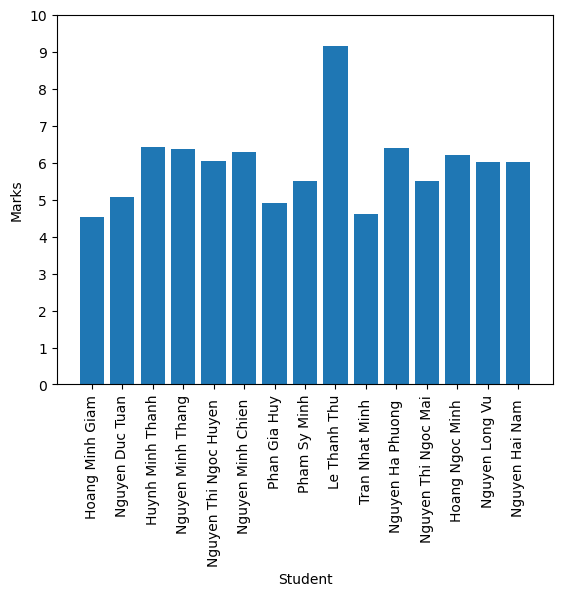

In [36]:
Marks = df_tong_hop["Diem Trung Binh"]
Names = df_tong_hop["Ho Ten"]
exMarks = range(0, 11)

plt.bar(Names, Marks)
plt.xticks(rotation=90)
plt.yticks(exMarks)
plt.xlabel("Student")
plt.ylabel("Marks")
plt.show()

In [37]:
writer = pd.ExcelWriter('BaiTapLonPython2.xlsx')
df_sinh_vien.to_excel(writer, "Sinh Vien", index = False)
df_diem_mon_1.to_excel(writer, "Diem Mon 1", index = False)
df_diem_mon_2.to_excel(writer, "Diem Mon 2", index = False)
df_diem_mon_3.to_excel(writer, "Diem Mon 3", index = False)
df_tong_hop.to_excel(writer, "Tong Hop", index = False)
df_ko_qua_mon_1.to_excel(writer, "Sinh Vien Khong Qua Mon 1", index = False)
df_ko_qua_mon_2.to_excel(writer, "Sinh Vien Khong Qua Mon 2", index = False)
df_ko_qua_mon_3.to_excel(writer, "Sinh Vien Khong Qua Mon 3", index = False)
df_qua.to_excel(writer, "Sinh Vien Qua Mon", index = False)

writer.close()